In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Data path handlers
TRAIN_TEST_SET_PATH = 'smote_fdataset/dataset/'

## Selecting the desired features
parameters = ['fz', 'fx', 'fy', 'mz', 'mx', 'my']

### Getting data
X_train = pd.read_csv(TRAIN_TEST_SET_PATH+'X_train.csv',index_col=0)

### Getting original features
f_z_dt = X_train.iloc[:, X_train.columns.str.contains(parameters[0])]
m_z_dt = X_train.iloc[:, X_train.columns.str.contains(parameters[3])]

f_z = np.array(f_z_dt)
m_z = np.array(m_z_dt)

In [3]:
print(f_z.shape)
print(m_z.shape)

(380, 1556)
(380, 1556)


In [4]:
### Time to plot graphics
time_step = 0.012
time = np.arange(0.0, f_z.shape[1]*time_step, time_step)
print(time.shape)

(1556,)


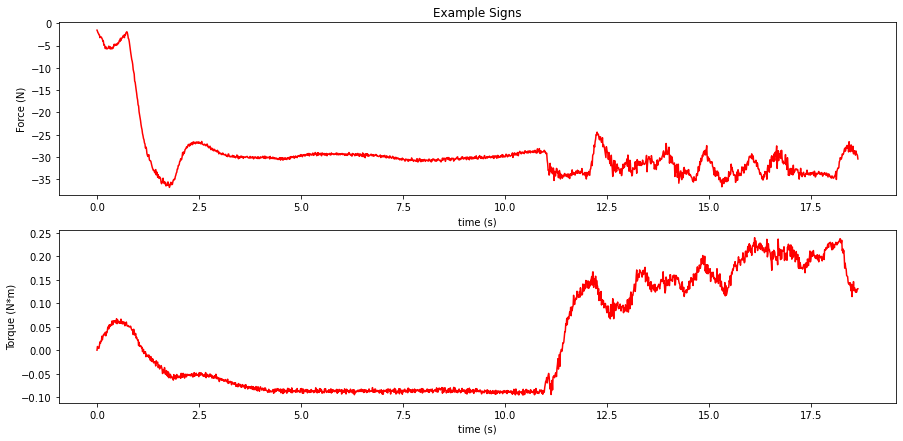

In [5]:
sample_example = 18
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,7))
ax0.plot(time,f_z[sample_example],color='red')
ax0.set_ylabel('Force (N)')
ax0.set_xlabel('time (s)')
ax1.plot(time,m_z[sample_example],color='red')
ax1.set_ylabel('Torque (N*m)')
ax1.set_xlabel('time (s)')
ax0.set_title('Example Signs')
plt.show()

# Simple Moving Average (SMA)

In [6]:
#Implementation using numpy array like input - not optimized
'''def Simple_Rolling_Average_and_Std(X, period):
    
    matrix_rolling_mean = []
    matrix_rolling_std = []
    
    for sample in X:
        
        rolling_mean = np.zeros(sample.shape)
        rolling_std = np.zeros(sample.shape)
        
        for i in range(period):
            rolling_mean[i] = np.mean(sample[:(i+1)])
            rolling_std[i] = np.std(sample[:(i+1)], ddof=1)
        
        for i in range(period, sample.shape[0]):
            rolling_mean[i] = np.mean(sample[i-period+1:i+1])
            rolling_std[i] = np.std(sample[i-period+1:i+1], ddof=1)
        
        matrix_rolling_mean.append(rolling_mean)
        matrix_rolling_std.append(rolling_std)
        
    matrix_rolling_mean = np.array(matrix_rolling_mean)
    matrix_rolling_std = np.array(matrix_rolling_std)
    matrix_rolling_std = np.nan_to_num(matrix_rolling_std, nan=0)
    
    return matrix_rolling_mean, matrix_rolling_std'''

'def Simple_Rolling_Average_and_Std(X, period):\n    \n    matrix_rolling_mean = []\n    matrix_rolling_std = []\n    \n    for sample in X:\n        \n        rolling_mean = np.zeros(sample.shape)\n        rolling_std = np.zeros(sample.shape)\n        \n        for i in range(period):\n            rolling_mean[i] = np.mean(sample[:(i+1)])\n            rolling_std[i] = np.std(sample[:(i+1)], ddof=1)\n        \n        for i in range(period, sample.shape[0]):\n            rolling_mean[i] = np.mean(sample[i-period+1:i+1])\n            rolling_std[i] = np.std(sample[i-period+1:i+1], ddof=1)\n        \n        matrix_rolling_mean.append(rolling_mean)\n        matrix_rolling_std.append(rolling_std)\n        \n    matrix_rolling_mean = np.array(matrix_rolling_mean)\n    matrix_rolling_std = np.array(matrix_rolling_std)\n    matrix_rolling_std = np.nan_to_num(matrix_rolling_std, nan=0)\n    \n    return matrix_rolling_mean, matrix_rolling_std'

In [7]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

In [8]:
#period = 3
#f_z_rolling_mean, f_z_rolling_std = Simple_Rolling_Average_and_Std(f_z, period)
#m_z_rolling_mean, m_z_rolling_std = Simple_Rolling_Average_and_Std(m_z, period)

In [9]:
#Implementation using dataframe form pandas like input - optimized !!!
# X - DataFrame type
# period - int value
# min_period = int value
def SMA(X, period, min_period = 1, fill_nan = True):
    rolling_mean = X.rolling(window = period, axis = 1, min_periods=min_period).mean()
    rolling_std = X.rolling(window = period, axis = 1, min_periods=min_period).std()
    if(fill_nan):
        rolling_mean = rolling_mean.fillna(value=0,axis=1)
        rolling_std = rolling_std.fillna(value=0,axis=1)
    rolling_mean = np.array(rolling_mean)
    rolling_std = np.array(rolling_std)
    return rolling_mean, rolling_std
# Return numpy arrays

In [10]:
###Getting rolling mean and std
period = 100
f_z_pd_rolling_mean, f_z_pd_rolling_std = SMA(f_z_dt, period)
m_z_pd_rolling_mean, m_z_pd_rolling_std = SMA(m_z_dt, period)
print(f_z_pd_rolling_mean.shape)
print(m_z_pd_rolling_mean.shape)
print(type(f_z_pd_rolling_mean))

(380, 1556)
(380, 1556)
<class 'numpy.ndarray'>


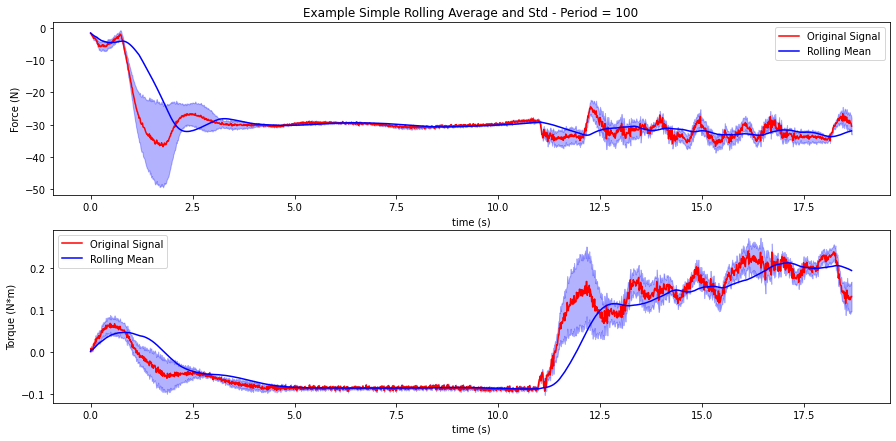

In [11]:
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,7))
ax0.plot(time,f_z[sample_example],color='red', label='Original Signal')
ax0.plot(time, f_z_pd_rolling_mean[sample_example], color='blue', label='Rolling Mean')
ax0.fill_between(time, f_z[sample_example] - f_z_pd_rolling_std[sample_example], f_z[sample_example] + f_z_pd_rolling_std[sample_example], color=(0,0,1,0.3))
ax0.set_ylabel('Force (N)')
ax0.set_xlabel('time (s)')
legend_without_duplicate_labels(ax0)

ax1.plot(time,m_z[sample_example],color='red', label='Original Signal')
ax1.plot(time, m_z_pd_rolling_mean[sample_example], color='blue', label='Rolling Mean')
ax1.fill_between(time, m_z[sample_example] - m_z_pd_rolling_std[sample_example], m_z[sample_example] + m_z_pd_rolling_std[sample_example], color=(0,0,1,0.3))
ax1.set_ylabel('Torque (N*m)')
ax1.set_xlabel('time (s)')
legend_without_duplicate_labels(ax1)

ax0.set_title('Example Simple Rolling Average and Std - Period = ' + str(period))
plt.show()

# Weighted Moving Average (WMA)

In [12]:
def WMA(X, weights,fill_nan = False):
    rolling_wmean = X.rolling(window = weights.shape[0], axis = 1).apply(lambda x: np.sum(weights*x) / np.sum(weights), raw=True)
    rolling_wstd = X.rolling(window = weights.shape[0], axis = 1).apply(lambda x: np.sqrt(np.sum(weights*np.square(x-(np.sum(weights*x) / np.sum(weights))))/(((weights.shape[0]-1)/weights.shape[0])*np.sum(weights))), raw=True)
    if(fill_nan):
        rolling_wmean = rolling_wmean.fillna(value=0,axis=1)
        rolling_wstd = rolling_wstd.fillna(value=0,axis=1)
    rolling_wmean = np.array(rolling_wmean)
    rolling_wstd = np.array(rolling_wstd)
    return rolling_wmean, rolling_wstd

In [13]:
weights = np.concatenate((np.ones(10),np.ones(10)*2,np.ones(10)*3,np.ones(10)*2,np.ones(10)))
print(weights)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [14]:
f_z_rolling_waverage, f_z_rolling_wstd = WMA(f_z_dt, weights)
m_z_rolling_waverage, m_z_rolling_wstd = WMA(m_z_dt, weights)
print(f_z_rolling_waverage.shape)
print(f_z_rolling_wstd.shape)
print(type(f_z_rolling_waverage))

(380, 1556)
(380, 1556)
<class 'numpy.ndarray'>


In [15]:
print(f_z_rolling_waverage)

[[         nan          nan          nan ... -27.84771    -27.88431667
  -27.92636222]
 [         nan          nan          nan ... -31.61693889 -31.60081222
  -31.63039333]
 [         nan          nan          nan ... -34.14471222 -34.10361222
  -34.06855222]
 ...
 [         nan          nan          nan ... -29.86608444 -29.66660667
  -29.46447222]
 [         nan          nan          nan ... -27.32353889 -27.40974667
  -27.52531667]
 [         nan          nan          nan ... -10.68876111 -10.44596222
  -10.22516889]]


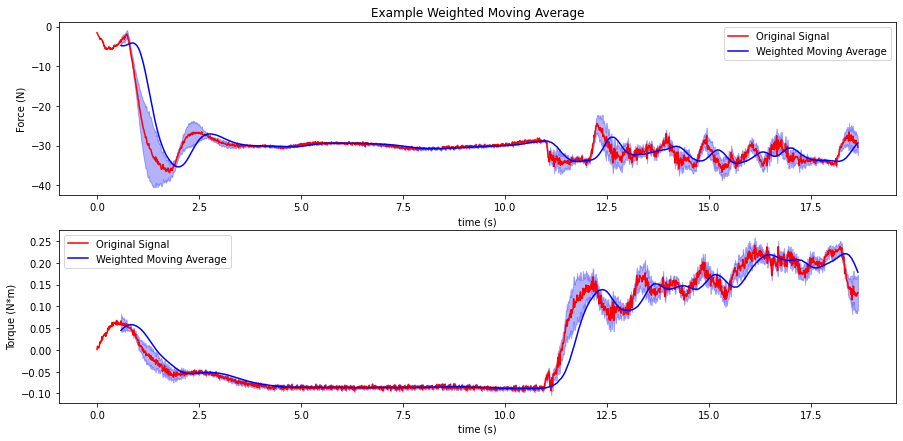

In [16]:
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,7))
ax0.plot(time,f_z[sample_example],color='red', label='Original Signal')
ax0.plot(time, f_z_rolling_waverage[sample_example], color='blue', label='Weighted Moving Average')
ax0.fill_between(time, f_z[sample_example] - f_z_rolling_wstd[sample_example], f_z[sample_example] + f_z_rolling_wstd[sample_example], color=(0,0,1,0.3))
ax0.set_ylabel('Force (N)')
ax0.set_xlabel('time (s)')
legend_without_duplicate_labels(ax0)

ax1.plot(time,m_z[sample_example],color='red', label='Original Signal')
ax1.plot(time, m_z_rolling_waverage[sample_example], color='blue', label='Weighted Moving Average')
ax1.fill_between(time, m_z[sample_example] - m_z_rolling_wstd[sample_example], m_z[sample_example] + m_z_rolling_wstd[sample_example], color=(0,0,1,0.3))
ax1.set_ylabel('Torque (N*m)')
ax1.set_xlabel('time (s)')
legend_without_duplicate_labels(ax1)

ax0.set_title('Example Weighted Moving Average')
plt.show()

# Exponential Moving Average (EMA)

In [17]:
def EMA(X, alpha, adjust = True, fill_nan = False, min_period = 1):
    rolling_exp_average = X.ewm(adjust=adjust, alpha=alpha, min_periods=min_period, axis=1).mean()
    rolling_exp_std = X.ewm(adjust=adjust, alpha=alpha, min_periods=min_period, axis=1).std()
    if(fill_nan):
        rolling_exp_average = rolling_exp_average.fillna(value=0,axis=1)
        rolling_exp_std = rolling_exp_std.fillna(value=0,axis=1)
    rolling_exp_average = np.array(rolling_exp_average)
    rolling_exp_std = np.array(rolling_exp_std)
    return rolling_exp_average, rolling_exp_std

In [18]:
alpha =0.01
f_z_exp_average, f_z_exp_std = EMA(f_z_dt, alpha)
m_z_exp_average, m_z_exp_std = EMA(m_z_dt, alpha)
print(f_z_exp_average.shape)
print(f_z_exp_std.shape)
print(type(f_z_exp_std))

(380, 1556)
(380, 1556)
<class 'numpy.ndarray'>


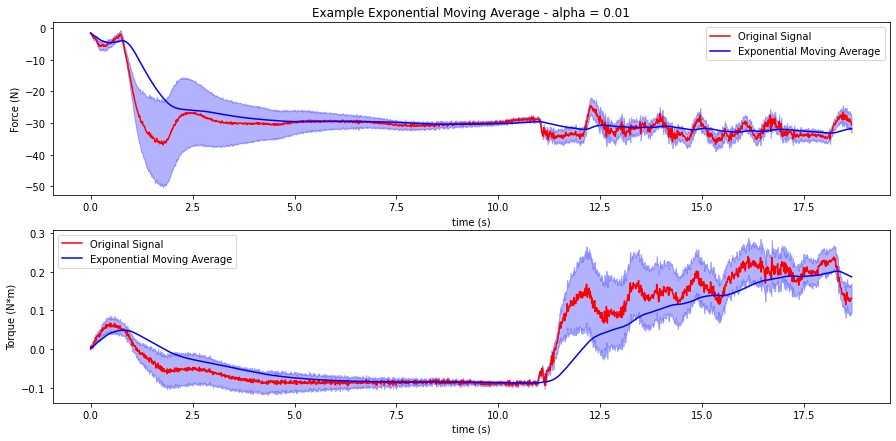

In [19]:
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,7))
ax0.plot(time,f_z[sample_example],color='red', label='Original Signal')
ax0.plot(time, f_z_exp_average[sample_example], color='blue', label='Exponential Moving Average')
ax0.fill_between(time, f_z[sample_example] - f_z_exp_std[sample_example], f_z[sample_example] + f_z_exp_std[sample_example], color=(0,0,1,0.3))
ax0.set_ylabel('Force (N)')
ax0.set_xlabel('time (s)')
legend_without_duplicate_labels(ax0)

ax1.plot(time,m_z[sample_example],color='red', label='Original Signal')
ax1.plot(time, m_z_exp_average[sample_example], color='blue', label='Exponential Moving Average')
ax1.fill_between(time, m_z[sample_example] - m_z_exp_std[sample_example], m_z[sample_example] + m_z_exp_std[sample_example], color=(0,0,1,0.3))
ax1.set_ylabel('Torque (N*m)')
ax1.set_xlabel('time (s)')
legend_without_duplicate_labels(ax1)

ax0.set_title('Example Exponential Moving Average - alpha = ' + str(alpha))
plt.show()

# Peak Detection

In [20]:
def Peak_Indices_Detection(X, prominence=0.1, width=None, distance=None, threshold=None):
    from scipy.signal import find_peaks
    X_peak_ind = []
    for sample in X:
        peaks_ind, _ = find_peaks(sample, prominence=prominence, width=width, distance=distance, threshold=threshold)
        X_peak_ind.append(peaks_ind)
    return X_peak_ind
        

In [21]:
peaks_fz_ind = Peak_Indices_Detection(f_z_rolling_waverage, prominence=0.5)
peaks_mz_ind = Peak_Indices_Detection(m_z_rolling_waverage, prominence=0.001)
print(len(peaks_fz_ind))

380


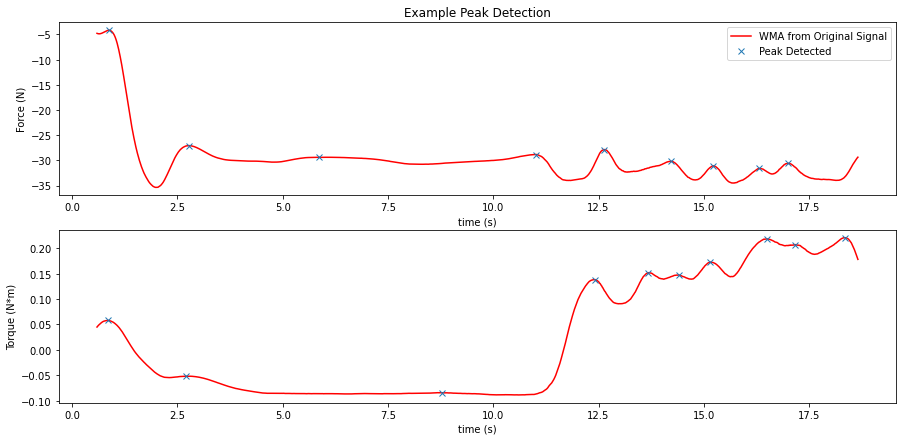

In [22]:
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,7))
ax0.plot(time,f_z_rolling_waverage[sample_example],color='red', label='WMA from Original Signal')
ax0.plot(time[peaks_fz_ind[sample_example]], f_z_rolling_waverage[sample_example][peaks_fz_ind[sample_example]], "x", label='Peak Detected')
ax0.set_ylabel('Force (N)')
ax0.set_xlabel('time (s)')
legend_without_duplicate_labels(ax0)
ax1.plot(time,m_z_rolling_waverage[sample_example],color='red')
ax1.plot(time[peaks_mz_ind[sample_example]], m_z_rolling_waverage[sample_example][peaks_mz_ind[sample_example]], "x")
ax1.set_ylabel('Torque (N*m)')
ax1.set_xlabel('time (s)')
ax0.set_title('Example Peak Detection')
plt.show()

In [23]:
window_width = 40
peak_extr_f_z = []
peak_extr_time = []
for peak in peaks_fz_ind[sample_example]:
    inf = peak-window_width
    sup = peak+window_width
    if(inf < 0 ):
        inf = 0
    if(sup > f_z_rolling_waverage[sample_example].shape[0]):
        sup = f_z_rolling_waverage[sample_example].shape[0]
    peak_extr_f_z.append(f_z_rolling_waverage[sample_example][inf:sup])
    peak_extr_time.append(time[inf:sup])

In [24]:
def Peak_Extraction(X, Peak_Indices, time, window_width=40):
    Peak_extr = []
    Peak_time = []
    for (sample, peaks) in zip(X, Peak_Indices):
        peak_extr = []
        peak_time = []

        for peak in peaks:
            inf = peak-window_width
            sup = peak+window_width
            if(inf < 0 ):
                inf = 0
            if(sup > sample.shape[0]):
                sup = sample.shape[0]
            peak_extr.append(sample[inf:sup])
            peak_time.append(time[inf:sup])
            
        Peak_extr.append(peak_extr)
        Peak_time.append(peak_time)
        
    return Peak_extr, Peak_time

In [25]:
peak_extr_f_z, peak_extr_time_f = Peak_Extraction(f_z_rolling_waverage, peaks_fz_ind, time)
peak_extr_m_z, peak_extr_time_m = Peak_Extraction(m_z_rolling_waverage, peaks_mz_ind, time)
print(len(peak_extr_f_z))

380


Text(0.5, 1.0, 'Example Peak Extraction')

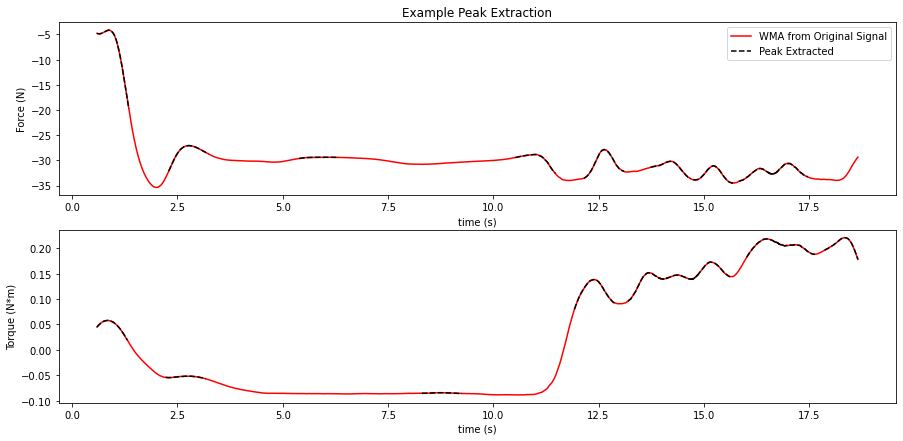

In [26]:
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,7))
ax0.plot(time,f_z_rolling_waverage[sample_example],color='red', label='WMA from Original Signal')
for (peak,time_it) in zip(peak_extr_f_z[sample_example], peak_extr_time_f[sample_example]):
    ax0.plot(time_it, peak, "--", label='Peak Extracted', color='black')
ax0.set_ylabel('Force (N)')
ax0.set_xlabel('time (s)')
legend_without_duplicate_labels(ax0)

ax1.plot(time,m_z_rolling_waverage[sample_example],color='red')
for (peak,time_it) in zip(peak_extr_m_z[sample_example], peak_extr_time_m[sample_example]):
    ax1.plot(time_it, peak, "--", color='black')
ax1.set_ylabel('Torque (N*m)')
ax1.set_xlabel('time (s)')
ax0.set_title('Example Peak Extraction')

In [28]:
def Derivate_Peak(X, t):
    dX_dt = []
    for (sample, sample_time) in zip(X,t):
        peak_diff = []
        for (peak, peak_time) in zip (sample, sample_time):
            peak_diff.append(np.diff(peak)/np.diff(peak_time))
        dX_dt.append(peak_diff)
    return np.array(dX_dt)

In [29]:
peak_dif_f_z = Derivate_Peak(peak_extr_f_z, peak_extr_time_f)
peak_dif_m_z = Derivate_Peak(peak_extr_m_z, peak_extr_time_m)
print(len(peak_dif_f_z))

380


/home/matheus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Text(0.5, 1.0, 'Example Peak Derivative')

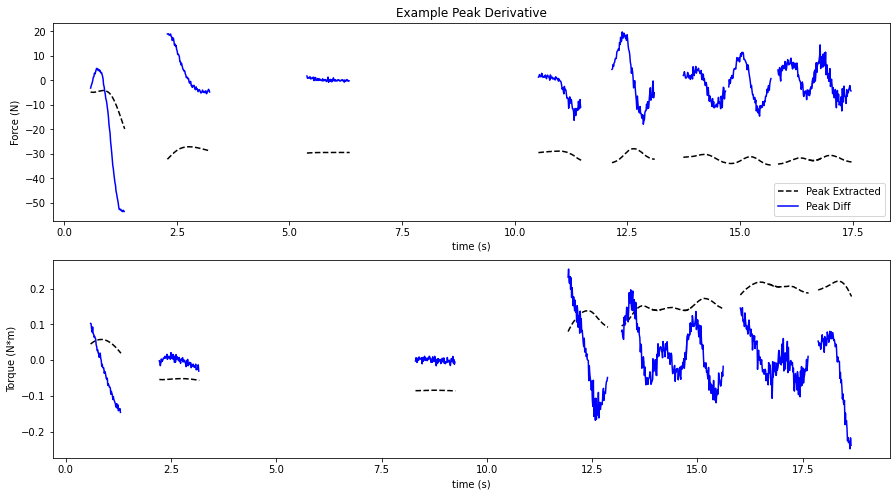

In [41]:
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,8))
for (peak,time_it, diff) in zip(peak_extr_f_z[sample_example], peak_extr_time_f[sample_example], peak_dif_f_z[sample_example]):
    ax0.plot(time_it, peak, "--", label='Peak Extracted', color='black')
    ax0.plot(time_it[:-1], diff, label='Peak Diff', color='blue')
ax0.set_ylabel('Force (N)')
ax0.set_xlabel('time (s)')
legend_without_duplicate_labels(ax0)

for (peak,time_it, diff) in zip(peak_extr_m_z[sample_example], peak_extr_time_m[sample_example], peak_dif_m_z[sample_example]):
    ax1.plot(time_it, peak, "--",color='black')
    ax1.plot(time_it[:-1], diff, label='Peak Diff', color='blue')
ax1.set_ylabel('Torque (N*m)')
ax1.set_xlabel('time (s)')
ax0.set_title('Example Peak Derivative')